logistic regression

This is a binary classification: classifying into 2 groups i.e a decision boundary
its curve is S shaped, which is a type of sigmoid function.
sigmoid function maps out the values of y is between 0and 1
it gives 2 possible outcomes


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
pd.set_option('display.max_columns', 80)

In [85]:
df= pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [86]:
df.shape

(145460, 23)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [88]:
categorical = [var for var in df.columns if df[var].dtype == 'object']
print('There are {} categorical variables \n'. format(len(categorical)))

print('They are: ', categorical)

There are 7 categorical variables 

They are:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [89]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [90]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


cardinality is the number of unique values in the categorical data column. if it has a high number of unique values, it has a high cardinality

In [91]:
#to check th cardinality;
for var in categorical:
    print(var, 'contains', len(df[var].unique()),'unique values')

Date contains 3436 unique values
Location contains 49 unique values
WindGustDir contains 17 unique values
WindDir9am contains 17 unique values
WindDir3pm contains 17 unique values
RainToday contains 3 unique values
RainTomorrow contains 3 unique values


we are taking the columns one after the other and looking at them because the feautures we use will affect our model, so we have to make sure we know what is going on with them.

In [92]:
#to change date into datetime
df['Date'] = pd.to_datetime(df['Date'])

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [94]:
#extract the year from the date and add to the columns
df['Year'] = df['Date'].dt.year
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [95]:
df['Year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2007],
      dtype=int64)

In [96]:
#to extract the month
df['Month'] = df['Date'].dt.month
df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [97]:
len(df['Month'].unique())

12

In [98]:
#extract the date
df['day'] = df['Date'].dt.day
df['day'].head()

0    1
1    2
2    3
3    4
4    5
Name: day, dtype: int64

In [99]:
len(df['day'].unique())

31

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [101]:
#we will drop the year since we have extracted all we can from it
df.drop('Date', axis=1, inplace=True)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6,23
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24


In [102]:
#extract categorical features again since we have modified our data

categorical = [var for var in df.columns if df[var].dtype == 'object']
print('There are {} categorical variables \n'. format(len(categorical)))

print('They are: ', categorical)

There are 6 categorical variables 

They are:  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [103]:
df[categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [104]:
#exploring the categorical data one after the other
#start with location
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [105]:
len(df.Location.unique())

49

In [106]:
df.Location.value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


In [107]:
#lets get dummies for these columns(lets turn it to 1s and 0s)
location_dummy= pd.get_dummies(df.Location, drop_first=True)


In [108]:
pd.set_option('display.max_rows', 500)

In [109]:
location_dummy

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
145456,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
145458,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [110]:
#looking at the windgustDir column
len(df['WindGustDir'].unique())

17

In [111]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [112]:
df['WindGustDir'].value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [113]:
wind_dummy= pd.get_dummies(df.WindGustDir, drop_first= True, dummy_na= True)

In [114]:
wind_dummy

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145456,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
145457,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
145458,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [115]:
#WindDir9am, WindDir3pm, RainToday, RainTomorrow

In [116]:
#looking at winddir
len(df['WindDir9am'].unique())

17

In [117]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [118]:
df['WindDir9am'].value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [119]:
WindDir9am_dummy = pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True)
WindDir9am_dummy

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
145456,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
145458,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [120]:
#winddir3pm
len(df['WindDir3pm'].unique())

17

In [121]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [122]:
df['WindDir3pm'].value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [123]:
WindDir3pm_dummy = pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True)
WindDir3pm_dummy

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145456,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
145458,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
#raintoday
len(df['RainToday'].unique())

3

In [125]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [126]:
df['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [127]:
RainToday_dummy = pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True)
RainToday_dummy

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145455,0,0
145456,0,0
145457,0,0
145458,0,0


In [128]:
#Exploring our Numerical variables to see if we have outliers and all

numerical = [var for var in df.columns if df[var].dtype != 'object']
print('There are {} numerical variables \n'. format(len(numerical)))

print('They are: ', numerical)

There are 19 numerical variables 

They are:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'day']


In [129]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [130]:
df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
day                  0
dtype: int64

In [131]:
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


Text(0, 0.5, 'WindSpeed3pm')

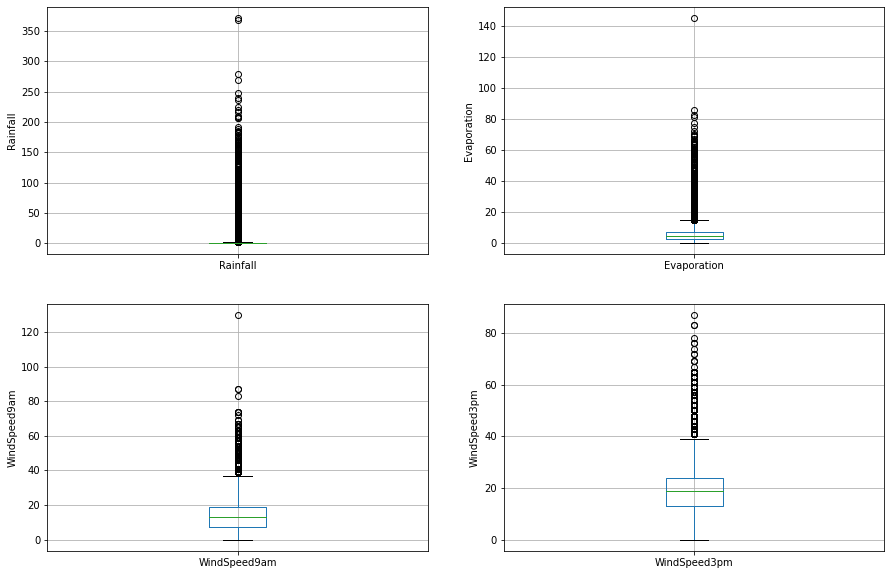

In [132]:
#to see these things in a box plot.
#all these are still preprocessing and EDA

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
fig= df.boxplot(column='Rainfall')
fig.set_ylabel('Rainfall')

plt.subplot(2,2,2)
fig= df.boxplot(column='Evaporation')
fig.set_ylabel('Evaporation')

plt.subplot(2,2,3)
fig= df.boxplot(column='WindSpeed9am')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2,2,4)
fig= df.boxplot(column='WindSpeed3pm')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'WindSpeed3pm')

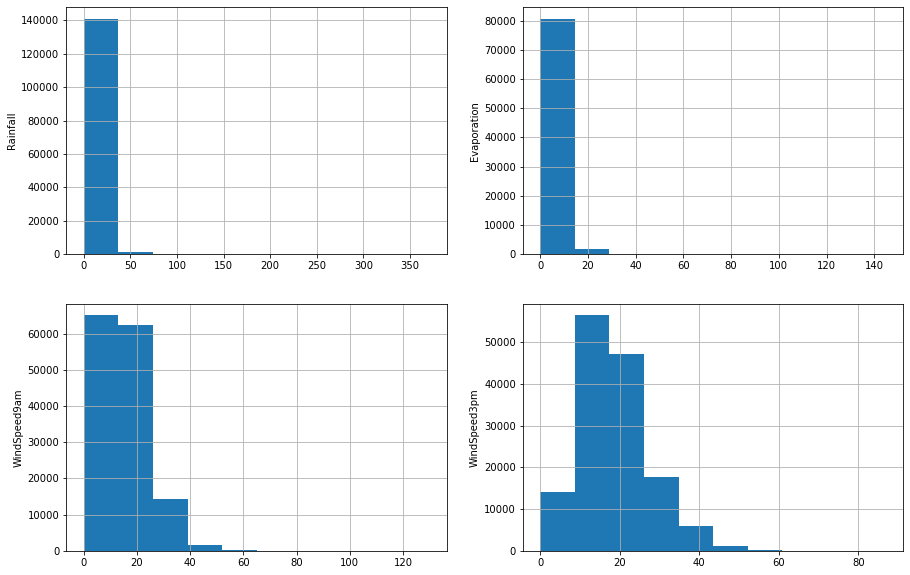

In [133]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
fig= df.Rainfall.hist()
fig.set_ylabel('Rainfall')

plt.subplot(2,2,2)
fig= df.Evaporation.hist()
fig.set_ylabel('Evaporation')

plt.subplot(2,2,3)
fig= df.WindSpeed9am.hist()
fig.set_ylabel('WindSpeed9am')

plt.subplot(2,2,4)
fig= df.WindSpeed3pm.hist()
fig.set_ylabel('WindSpeed3pm')


In [134]:
#lets split the data into target and feature

X= df.drop(['RainTomorrow'], axis=1) #feature
y= df['RainTomorrow'] #target

In [135]:
#split into test and train data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.2, random_state=0)

In [136]:
#check the shape of our data

X_train.shape, X_test.shape

((116368, 24), (29092, 24))

#feature engineering
feature engineering is the process of transforming data or features into more useful features.These new features help us build a better model by probably increasing the predictive power of the model

In [137]:
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [138]:
#we would remove "raintomorrow cuz its the label"
categorical = [col for col in X_train.columns if X_train[col].dtypes=='O']

In [139]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [140]:
numerical= [col for col in X_train.columns if X_train[col].dtypes!='O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'day']

In [141]:
#we have a number of missing values but we wont be dropping them cux it is a high percentage of our data...instead we are gonna imput it
#assumptions on imputing the missing data
#1 we'd assume that the data is missing at random(we can use the mean, median or random sampling to imput missing data)
#2 when there is ouliers, we use median imputation because the median is more robust for outliera. the mean can be easily skewed for outliers
#and because we use outliers that we aint dropping, wwe use median


#to avoid overfitting, we input over the training data, then propagate to the test data
#i.e we extract the statistical measure for filling the data (median for here) from the train set only



In [142]:
for df1 in [X_train, X_test]:
    for col in numerical:
        col_median = X_train[col].median()
        df1[col].fillna(col_median,inplace= True)
        
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
day              0
dtype: int64

In [143]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
day              0
dtype: int64

In [144]:
#inputing for categorical variables
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace= True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace= True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace= True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace= True)


In [145]:
#now check if there are atill missing values
X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [146]:
X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [147]:
#NB: if using median, input your missing data before removing the outliers
#capping is setting bounds for the outliers



In [148]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyparsing!=3.0.5,>=2.0.2 in c:\users\innynoella\anaconda3\anaconda\lib\site-packages (from packaging>=21.3->statsmodels>=0.9.0->category_encoders) (3.0.4)



In [149]:
#encoding categorical data, lets start from raintoday
#for the raintoday because we only have yes and no, we would use binary encoder

import category_encoders as ce

encoder= ce.BinaryEncoder(cols=['RainToday'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [150]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,day
22926,NorfolkIsland,18.8,23.7,0.2,5.0,7.3,ESE,52.0,ESE,ESE,31.0,28.0,74.0,73.0,1016.6,1013.9,5.0,7.0,21.4,22.2,0,1,2014,3,12
80735,Watsonia,9.3,24.0,0.2,1.6,10.9,NE,48.0,NNW,NNE,13.0,24.0,74.0,55.0,1018.3,1014.6,3.0,5.0,14.3,23.2,0,1,2016,10,6
121764,Perth,10.9,22.2,1.4,1.2,9.6,SW,26.0,N,SW,0.0,11.0,85.0,47.0,1017.6,1014.9,1.0,2.0,16.6,21.5,1,0,2011,8,31
139821,Darwin,19.3,29.9,0.0,9.2,11.0,ESE,43.0,ESE,E,26.0,17.0,44.0,37.0,1015.9,1012.1,1.0,1.0,23.2,29.1,0,1,2010,6,11
1867,Albury,15.7,17.6,12.4,4.7,8.4,E,20.0,ESE,E,11.0,13.0,100.0,100.0,1015.2,1010.5,8.0,8.0,16.5,17.3,1,0,2014,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,Williamtown,17.8,38.1,0.0,26.0,8.4,NE,39.0,NNE,E,7.0,13.0,61.0,30.0,1014.5,1009.7,1.0,1.0,25.4,36.8,0,1,2015,12,20
97639,Adelaide,12.5,27.3,0.0,4.7,10.0,W,30.0,N,WNW,0.0,13.0,60.0,32.0,1019.2,1017.3,5.0,5.0,17.0,26.5,0,1,2012,3,11
95939,Townsville,17.0,29.8,0.0,5.6,8.4,ENE,22.0,NW,ENE,4.0,13.0,77.0,54.0,1019.6,1016.1,5.0,5.0,24.1,29.0,0,1,2016,6,10
117952,PerthAirport,11.9,22.0,3.8,6.2,7.7,SSW,35.0,SSE,WNW,19.0,24.0,55.0,49.0,1020.0,1018.5,7.0,6.0,17.1,19.7,1,0,2009,11,20


In [151]:
#Lets check if it has reflected, yes it has. Now we have zers and ones
X_test

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,day
138175,AliceSprings,21.9,39.4,1.6,11.2,11.5,NNW,57.0,NE,N,20.0,33.0,50.0,26.0,1008.5,1004.1,2.0,6.0,29.8,35.4,0,1,2014,12,3
38638,WaggaWagga,20.5,37.5,0.0,9.2,8.4,WNW,59.0,ENE,N,17.0,20.0,47.0,22.0,1012.9,1006.5,4.0,7.0,27.3,35.7,1,0,2015,1,8
124058,SalmonGums,5.1,17.2,0.2,4.7,8.4,W,50.0,WNW,W,28.0,22.0,68.0,51.0,1017.6,1015.2,5.0,5.0,10.1,16.1,1,0,2009,8,16
99214,Adelaide,11.9,16.8,1.0,4.7,8.4,SW,28.0,WNW,SW,11.0,13.0,80.0,79.0,1018.5,1017.7,5.0,5.0,14.3,15.2,1,0,2016,8,31
25097,Penrith,7.5,21.3,0.0,4.7,8.4,NE,15.0,SW,NNE,2.0,7.0,88.0,52.0,1017.6,1015.2,5.0,5.0,13.7,21.1,1,0,2011,8,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133493,Launceston,18.2,24.4,8.0,4.7,8.4,NW,44.0,SSE,NW,13.0,20.0,85.0,70.0,1007.5,1003.4,5.0,5.0,20.1,23.9,0,1,2010,3,8
43818,Wollongong,9.4,18.0,0.0,4.7,8.4,WSW,48.0,WSW,WSW,26.0,17.0,54.0,37.0,1026.8,1026.3,5.0,5.0,12.5,17.3,1,0,2012,6,24
28118,Richmond,10.6,15.4,6.0,1.6,8.4,SE,28.0,SSW,NW,17.0,7.0,90.0,67.0,1009.8,1006.6,5.0,5.0,10.7,13.9,0,1,2011,9,9
120179,PerthAirport,18.6,26.9,0.0,4.0,7.2,E,63.0,E,E,28.0,24.0,67.0,53.0,1022.5,1020.1,7.0,6.0,21.3,25.8,1,0,2016,3,24


In [152]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [153]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']], 
                    pd.get_dummies(X_train.Location), 
                    pd.get_dummies(X_train.WindGustDir), 
                    pd.get_dummies(X_train.WindDir9am),
                    pd.get_dummies(X_train.WindDir3pm)], 
                   axis =1)

In [154]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)],
                    axis =1)

AttributeError: 'DataFrame' object has no attribute 'Location'

In [166]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)],
                    axis =1)

In [155]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,day,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,...,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
22926,18.8,23.7,0.2,5.0,7.3,52.0,31.0,28.0,74.0,73.0,1016.6,1013.9,5.0,7.0,21.4,22.2,2014,3,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
80735,9.3,24.0,0.2,1.6,10.9,48.0,13.0,24.0,74.0,55.0,1018.3,1014.6,3.0,5.0,14.3,23.2,2016,10,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
121764,10.9,22.2,1.4,1.2,9.6,26.0,0.0,11.0,85.0,47.0,1017.6,1014.9,1.0,2.0,16.6,21.5,2011,8,31,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
139821,19.3,29.9,0.0,9.2,11.0,43.0,26.0,17.0,44.0,37.0,1015.9,1012.1,1.0,1.0,23.2,29.1,2010,6,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1867,15.7,17.6,12.4,4.7,8.4,20.0,11.0,13.0,100.0,100.0,1015.2,1010.5,8.0,8.0,16.5,17.3,2014,4,10,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,17.8,38.1,0.0,26.0,8.4,39.0,7.0,13.0,61.0,30.0,1014.5,1009.7,1.0,1.0,25.4,36.8,2015,12,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97639,12.5,27.3,0.0,4.7,10.0,30.0,0.0,13.0,60.0,32.0,1019.2,1017.3,5.0,5.0,17.0,26.5,2012,3,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
95939,17.0,29.8,0.0,5.6,8.4,22.0,4.0,13.0,77.0,54.0,1019.6,1016.1,5.0,5.0,24.1,29.0,2016,6,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
117952,11.9,22.0,3.8,6.2,7.7,35.0,19.0,24.0,55.0,49.0,1020.0,1018.5,7.0,6.0,17.1,19.7,2009,11,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [167]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,day,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,...,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
138175,21.9,39.4,1.6,11.2,11.5,57.0,20.0,33.0,50.0,26.0,1008.5,1004.1,2.0,6.0,29.8,35.4,2014,12,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
38638,20.5,37.5,0.0,9.2,8.4,59.0,17.0,20.0,47.0,22.0,1012.9,1006.5,4.0,7.0,27.3,35.7,2015,1,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
124058,5.1,17.2,0.2,4.7,8.4,50.0,28.0,22.0,68.0,51.0,1017.6,1015.2,5.0,5.0,10.1,16.1,2009,8,16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
99214,11.9,16.8,1.0,4.7,8.4,28.0,11.0,13.0,80.0,79.0,1018.5,1017.7,5.0,5.0,14.3,15.2,2016,8,31,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
25097,7.5,21.3,0.0,4.7,8.4,15.0,2.0,7.0,88.0,52.0,1017.6,1015.2,5.0,5.0,13.7,21.1,2011,8,28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133493,18.2,24.4,8.0,4.7,8.4,44.0,13.0,20.0,85.0,70.0,1007.5,1003.4,5.0,5.0,20.1,23.9,2010,3,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
43818,9.4,18.0,0.0,4.7,8.4,48.0,26.0,17.0,54.0,37.0,1026.8,1026.3,5.0,5.0,12.5,17.3,2012,6,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
28118,10.6,15.4,6.0,1.6,8.4,28.0,17.0,7.0,90.0,67.0,1009.8,1006.6,5.0,5.0,10.7,13.9,2011,9,9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
120179,18.6,26.9,0.0,4.0,7.2,63.0,28.0,24.0,67.0,53.0,1022.5,1020.1,7.0,6.0,21.3,25.8,2016,3,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [158]:
#lets define our colum
cols= X_train.columns

In [159]:
cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'W', 'WNW', 'WSW'],
      dtype='object', length=118)

In [162]:
#next we do feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

X_train = scaler.fit_transform(X_train)


In [163]:
X_train

array([[6.75742574e-01, 5.38752363e-01, 5.44069641e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.40594059e-01, 5.44423440e-01, 5.44069641e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.80198020e-01, 5.10396975e-01, 3.80848749e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.31188119e-01, 6.54064272e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.04950495e-01, 5.06616257e-01, 1.03373232e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.07425743e-01, 4.06427221e-01, 2.17627856e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [169]:
X_test = scaler.fit_transform(X_test)

In [170]:
X_test

array([[7.06601467e-01, 8.53707415e-01, 4.31266846e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.72371638e-01, 8.15631263e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.95843521e-01, 4.08817635e-01, 5.39083558e-04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.30317848e-01, 3.72745491e-01, 1.61725067e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.25916870e-01, 6.03206413e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.42298289e-01, 4.00801603e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [172]:
#because of this scaling, our data is looking like an array, so we turn it back to dataframe

X_train =pd.DataFrame(X_train, columns= [cols])
X_test = pd.DataFrame(X_test, columns= [cols])

In [173]:
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,day,RainToday_0,RainToday_1,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,...,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0.675743,0.538752,0.000544,0.034483,0.503448,0.356589,0.238462,0.337349,0.74,0.73,0.596694,0.5888,0.555556,0.875,0.603376,0.529750,0.7,0.181818,0.366667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.440594,0.544423,0.000544,0.011034,0.751724,0.325581,0.100000,0.289157,0.74,0.55,0.624793,0.6000,0.333333,0.625,0.453586,0.548944,0.9,0.818182,0.166667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.480198,0.510397,0.003808,0.008276,0.662069,0.155039,0.000000,0.132530,0.85,0.47,0.613223,0.6048,0.111111,0.250,0.502110,0.516315,0.4,0.636364,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.688119,0.655955,0.000000,0.063448,0.758621,0.286822,0.200000,0.204819,0.44,0.37,0.585124,0.5600,0.111111,0.125,0.641350,0.662188,0.3,0.454545,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.599010,0.423440,0.033732,0.032414,0.579310,0.108527,0.084615,0.156627,1.00,1.00,0.573554,0.5344,0.888889,1.000,0.500000,0.435701,0.7,0.272727,0.300000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116363,0.650990,0.810964,0.000000,0.179310,0.579310,0.255814,0.053846,0.156627,0.61,0.30,0.561983,0.5216,0.111111,0.125,0.687764,0.809981,0.8,1.000000,0.633333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116364,0.519802,0.606805,0.000000,0.032414,0.689655,0.186047,0.000000,0.156627,0.60,0.32,0.639669,0.6432,0.555556,0.625,0.510549,0.612284,0.5,0.181818,0.333333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
116365,0.631188,0.654064,0.000000,0.038621,0.579310,0.124031,0.030769,0.156627,0.77,0.54,0.646281,0.6240,0.555556,0.625,0.660338,0.660269,0.9,0.454545,0.300000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,

In [175]:
#Lets check our y_train
y_train

22926     Yes
80735      No
121764     No
139821     No
1867      Yes
         ... 
41993      No
97639      No
95939      No
117952     No
43567      No
Name: RainTomorrow, Length: 116368, dtype: object

In [176]:
y_train.isnull().sum()

2623

In [179]:
#lets fill the missing data
for df3 in [y_train, y_test]:
    df3.fillna(y_train.mode()[0], inplace= True)

y_train.isnull().sum()


0

In [180]:
y_test.isnull().sum()

0

In [ ]:
#so we have dealt with the missing values

In [181]:
#okay, so now we are good to train our model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver= 'liblinear', random_state=0)
logreg.fit(X_train, y_train)

C:\Users\InnyNoella\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(random_state=0, solver='liblinear')

In [182]:
#lets now test on the output
y_pred_test= logreg.predict(X_test)

C:\Users\InnyNoella\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [183]:
y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [184]:
#logistic regression gives probabilities;
#probability of getting zero means no rain

logreg.predict_proba(X_test)[:,0]

C:\Users\InnyNoella\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([0.83401063, 0.59925213, 0.69845489, ..., 0.53647474, 0.51711908,
       0.94604646])

#so this just mean
0.8 is almost 1, mwans no rain...'no'
0.59 same same
thats why we have an array of nos from our 'y_pred_test'

In [185]:
logreg.predict_proba(X_test)[:,1]

C:\Users\InnyNoella\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([0.16598937, 0.40074787, 0.30154511, ..., 0.46352526, 0.48288092,
       0.05395354])

In [187]:
#check for the accuracy
from sklearn.metrics import accuracy_score

print('Model accuracy score(test): ', accuracy_score(y_test, y_pred_test))

Model accuracy score(test):  0.8387872954764196


In [188]:
#lets check for the accuracy of the train data too, to be sure it isnt overfitted or under

y_pred_train = logreg.predict(X_train)
print('Model accuracy score(train): ', accuracy_score(y_train, y_pred_train))

C:\Users\InnyNoella\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Model accuracy score(train):  0.848463495118933


In [189]:
#null accuracy is the acuracy that can be acheived if the model keeps predicting the most frequent
#value
#we need to compare this null accuracy to the model accuracy 

y_test.value_counts()

No     22726
Yes     6366
Name: RainTomorrow, dtype: int64

In [191]:
#to check the null accuracy
null_accuracy = 22726/(len(y_test))

null_accuracy

0.7811769558641551

In [ ]:
#null accuracy is less than our actual accuracy, hence, our model is not just predicting 
#the most frequent value, it has actually learnt
#for eda in machine learning, we need to see the correlation btw the varibles...


#### model accuracy metrics for logistic regression

1. Confusion Metrics; this is a summarization tool that summarizes the performance of the model.
it shows the type of error the model is making. it give the dummary of correct and incorrect prediction broken down by each category. The summary is in a tabular form

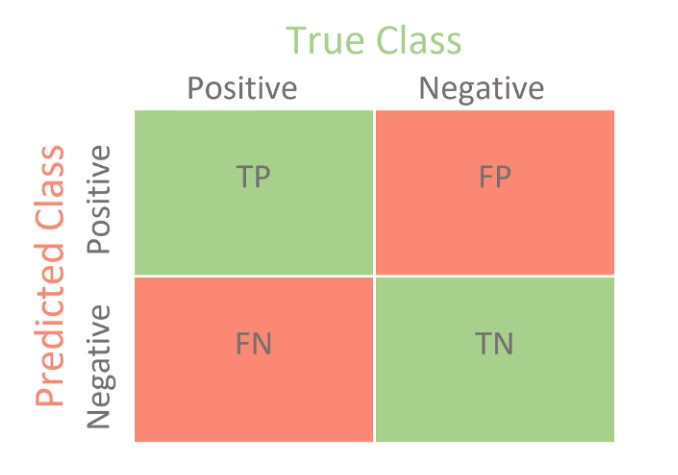



In a clasification model, we have four posible outcomes. They are
- True positives (TP)- These occur when the model predicts that an observation belongs to a class and the observation actually belongs to that class.

- True negative (TN) - The model predicts that an obervation does not belong to a class and it actually doesn not belong to that class. 

- False positives (FP) - The model predicct that an observation belongs to a certain class but the observation belongs to another class. This is also called Type I error

- False negatives (FN) - Here, we predict that an observation does not belong to a certain class but actually belongs to that cass. This is type II error.

In [192]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred_test)

In [193]:
cm

array([[21122,  1604],
       [ 3086,  3280]], dtype=int64)

In [194]:
print('True positives(TP) = ', cm[0,0]) #row,column
print('False positive(FP) = ', cm[0,1])
print('False negatives(FN) = ', cm[1,0])
print('True negative(TN) = ', cm[1,1])

True positives(TP) =  21122
False positive(FP) =  1604
False negatives(FN) =  3086
True negative(TN) =  3280


- True positives (Actual positives:1, predicted positive:1) -21122

- True negatives (Actual negative: 0, predicted negative:0 ) - 3280

- False positives (actual negative:0, predicted positive: 1) -1604 (Type I error)

- False negative (actual positive :1, predicted negative: 0): 3086 (Type II error)

In [196]:
#visualize with heatmaps

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

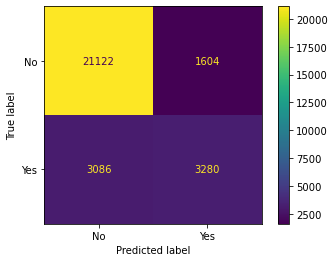

In [197]:
disp.plot()

Above is a visualization of the confusion matrix. on y axis is the true label and on x axis  is the predicted label 
For 'No' against 'No' with value 21122, these are the labels that are actually no and also predicted as no, 
For 'No' against 'Yes', with value 1604, these are predicted as yes but are actually no. 

For 'Yes' against 'No' with value 3086, these are the labels that are actually yes but predicted as no, 
For 'Yes' against 'Yes', with value 3280, these are predicted as yes and are actually yes. 

A case specific explanation of this is that: our model is really good at predicting when there wouln't be rain
in this situation, it is correct approximately 93% of the time i.e 21122/(21122+1604). This means if it predicts no, there is a 93% chance that the actual label is no.

For predicting yes, it is not so accurate. it predicts yes, there would be rain correctly only about 52% of the time i.e 3280/(3280+3086). This means that if the model predits that there would be rain, there is a 48% chance it will be wrong. 

In [202]:
21122/(21122+1604)
3280/(3280+3086)

0.5152371976123155

###### Classification report 

This is another way of evaluating a classification model. 
It displays the precision, recall and f1 of the model (each will be discussed as we go on)

In [199]:
from sklearn.metrics import classification_report


In [203]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.93      0.90     22726
         Yes       0.67      0.52      0.58      6366

    accuracy                           0.84     29092
   macro avg       0.77      0.72      0.74     29092
weighted avg       0.83      0.84      0.83     29092



###### Recall (What percentage of the positive cases did you catch?)

looking at the recall column, we can see that the values are as obtained in the explanation beneath the confusion matrix above. The recall shows us, per label, the percentage of time the model is correct in predicting true values. It is the ratio, for each label, of true predictions against the sum of both
the false and negative

i.e recall = TP/ (TP+FP) and TN/(TN+FN)

Recall is the percentage of the correctly predicted outcomes for each label, it is also a ratio, for each label, of the true values against the the sum of both the true and false values

Recall for the positive is also called sensitivity while that of the negative is specificity

Recall will show us the propotion of the correctly predicted values

###### Precision (what percent of your prediction is correct?)

It is the ability of the classifier not to label an observation as positive when it is not. 
in other words, it is the accuracy of the positive prediction. 

To calculate it, precision = TP/(TP+FN)

In [ ]:
# precision

21122/(21122+3086)

###### F1 (what percentage of your positive prediction were correct?)

F1 score is the weighted harmonic mean of precision and recall. Here, the best score is 1 and the worse is 0

F1 score = 2*(recall * precision)/(recall + precision)

###### Support 
support is the number of occurences of the class in the dataset. 

Imbalanced support(number of occurences) may skew our accuracy, and could indicate a need for rebalancing or stratified sampling. 

Looking at the support merely shows the distribution of the classes which shows us if we have an imbalanced data


##### F1 score vs accuracy 

For classification, F1 score tends to be more useful than your accuracy especially when we have an imbalanced dataset 
as we have here


Accuracy = (TP+TN)/(TP+TN+FN+FP)

If the error in predicting both classes are equally important, accuracy becomes very important 

##### How to choose between recall and precision?

In practice, we usually need to make a trade off between high precision and high recall. We rarely get to have both. 

To improve either of the two, we can 
- Tuning hyperparameters to maximize either the recall or precision 
- Varrying the decision threshold 

In [ ]:
#adjusting threshold, AUC and ROC

In [206]:
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

C:\Users\InnyNoella\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([[0.83401063, 0.16598937],
       [0.59925213, 0.40074787],
       [0.69845489, 0.30154511],
       ...,
       [0.53647474, 0.46352526],
       [0.51711908, 0.48288092],
       [0.94604646, 0.05395354]])

In [208]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['probability of No rain tomorrow(0)',
                                                         'probability of rain tomorrow(1)'])
y_pred_prob_df

,probability of No rain tomorrow(0),probability of rain tomorrow(1)
0,0.834011,0.165989
1,0.599252,0.400748
2,0.698455,0.301545
3,0.521101,0.478899
4,0.877456,0.122544
...,...,...
29087,0.400883,0.599117
29088,0.978531,0.021469
29089,0.536475,0.463525
29090,0.517119,0.482881


In [204]:
y_pred1 = logreg.predict_proba(X_test)[:,1]

C:\Users\InnyNoella\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [205]:
#plotting the Roc curve
from sklearn.metrics import roc_curve

fpr,tpr, thresholdsolds = roc_curve(y_test, y_pred1, pos_label='Yes')

#fpr2, tpr2, thresholds = roc_curve(y_test, y_pred0, pos_label='No'

Text(0, 0.5, 'true positive rate')

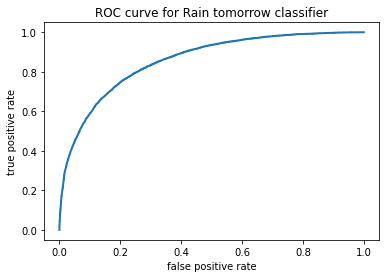

In [209]:
plt.figure(figsize = (6,4))
plt.plot(fpr,tpr,linewidth=2)
plt.title('ROC curve for Rain tomorrow classifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

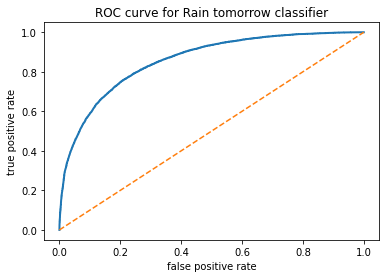

In [213]:
plt.figure(figsize = (6,4))
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'--')
plt.title('ROC curve for Rain tomorrow classifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [210]:
#computing AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test,y_pred1)
print(ROC_AUC)

0.8568884274735847
